# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [18]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [19]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

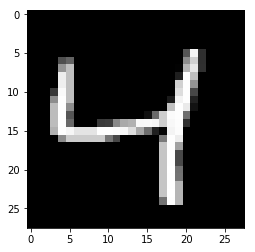

In [20]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [26]:
tf.layers.dense?

In [21]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 3 # feel free to change this value
image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, shape=(None,  image_size), name='inputs')
targets_ =  tf.placeholder(tf.float32, shape=(None,  image_size), name='targes')

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None) #linear 

# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)

# Mean of the loss
cost = tf.reduce_mean(loss) 

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

## Training

In [22]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [23]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6929
Epoch: 1/20... Training loss: 0.6923
Epoch: 1/20... Training loss: 0.6919
Epoch: 1/20... Training loss: 0.6917
Epoch: 1/20... Training loss: 0.6913
Epoch: 1/20... Training loss: 0.6905
Epoch: 1/20... Training loss: 0.6902
Epoch: 1/20... Training loss: 0.6896
Epoch: 1/20... Training loss: 0.6889
Epoch: 1/20... Training loss: 0.6880
Epoch: 1/20... Training loss: 0.6872
Epoch: 1/20... Training loss: 0.6858
Epoch: 1/20... Training loss: 0.6848
Epoch: 1/20... Training loss: 0.6832
Epoch: 1/20... Training loss: 0.6810
Epoch: 1/20... Training loss: 0.6791
Epoch: 1/20... Training loss: 0.6772
Epoch: 1/20... Training loss: 0.6744
Epoch: 1/20... Training loss: 0.6716
Epoch: 1/20... Training loss: 0.6685
Epoch: 1/20... Training loss: 0.6654
Epoch: 1/20... Training loss: 0.6613
Epoch: 1/20... Training loss: 0.6572
Epoch: 1/20... Training loss: 0.6521
Epoch: 1/20... Training loss: 0.6489
Epoch: 1/20... Training loss: 0.6442
E

Epoch: 1/20... Training loss: 0.2738
Epoch: 1/20... Training loss: 0.2734
Epoch: 1/20... Training loss: 0.2737
Epoch: 1/20... Training loss: 0.2755
Epoch: 1/20... Training loss: 0.2717
Epoch: 1/20... Training loss: 0.2789
Epoch: 1/20... Training loss: 0.2720
Epoch: 1/20... Training loss: 0.2691
Epoch: 1/20... Training loss: 0.2690
Epoch: 1/20... Training loss: 0.2815
Epoch: 1/20... Training loss: 0.2722
Epoch: 1/20... Training loss: 0.2745
Epoch: 1/20... Training loss: 0.2708
Epoch: 1/20... Training loss: 0.2677
Epoch: 1/20... Training loss: 0.2742
Epoch: 1/20... Training loss: 0.2756
Epoch: 1/20... Training loss: 0.2686
Epoch: 1/20... Training loss: 0.2736
Epoch: 1/20... Training loss: 0.2688
Epoch: 1/20... Training loss: 0.2682
Epoch: 1/20... Training loss: 0.2806
Epoch: 1/20... Training loss: 0.2690
Epoch: 1/20... Training loss: 0.2704
Epoch: 1/20... Training loss: 0.2690
Epoch: 1/20... Training loss: 0.2722
Epoch: 1/20... Training loss: 0.2738
Epoch: 1/20... Training loss: 0.2662
E

Epoch: 2/20... Training loss: 0.2524
Epoch: 2/20... Training loss: 0.2471
Epoch: 2/20... Training loss: 0.2540
Epoch: 2/20... Training loss: 0.2414
Epoch: 2/20... Training loss: 0.2530
Epoch: 2/20... Training loss: 0.2449
Epoch: 2/20... Training loss: 0.2463
Epoch: 2/20... Training loss: 0.2438
Epoch: 2/20... Training loss: 0.2541
Epoch: 2/20... Training loss: 0.2456
Epoch: 2/20... Training loss: 0.2487
Epoch: 2/20... Training loss: 0.2438
Epoch: 2/20... Training loss: 0.2426
Epoch: 2/20... Training loss: 0.2479
Epoch: 2/20... Training loss: 0.2549
Epoch: 2/20... Training loss: 0.2499
Epoch: 2/20... Training loss: 0.2464
Epoch: 2/20... Training loss: 0.2431
Epoch: 2/20... Training loss: 0.2488
Epoch: 2/20... Training loss: 0.2467
Epoch: 2/20... Training loss: 0.2454
Epoch: 2/20... Training loss: 0.2440
Epoch: 2/20... Training loss: 0.2447
Epoch: 2/20... Training loss: 0.2390
Epoch: 2/20... Training loss: 0.2442
Epoch: 2/20... Training loss: 0.2451
Epoch: 2/20... Training loss: 0.2498
E

Epoch: 3/20... Training loss: 0.2440
Epoch: 3/20... Training loss: 0.2398
Epoch: 3/20... Training loss: 0.2328
Epoch: 3/20... Training loss: 0.2356
Epoch: 3/20... Training loss: 0.2373
Epoch: 3/20... Training loss: 0.2318
Epoch: 3/20... Training loss: 0.2333
Epoch: 3/20... Training loss: 0.2393
Epoch: 3/20... Training loss: 0.2395
Epoch: 3/20... Training loss: 0.2318
Epoch: 3/20... Training loss: 0.2364
Epoch: 3/20... Training loss: 0.2362
Epoch: 3/20... Training loss: 0.2376
Epoch: 3/20... Training loss: 0.2351
Epoch: 3/20... Training loss: 0.2267
Epoch: 3/20... Training loss: 0.2369
Epoch: 3/20... Training loss: 0.2357
Epoch: 3/20... Training loss: 0.2309
Epoch: 3/20... Training loss: 0.2401
Epoch: 3/20... Training loss: 0.2324
Epoch: 3/20... Training loss: 0.2314
Epoch: 3/20... Training loss: 0.2403
Epoch: 3/20... Training loss: 0.2319
Epoch: 3/20... Training loss: 0.2380
Epoch: 3/20... Training loss: 0.2342
Epoch: 3/20... Training loss: 0.2364
Epoch: 3/20... Training loss: 0.2349
E

Epoch: 4/20... Training loss: 0.2286
Epoch: 4/20... Training loss: 0.2354
Epoch: 4/20... Training loss: 0.2305
Epoch: 4/20... Training loss: 0.2303
Epoch: 4/20... Training loss: 0.2264
Epoch: 4/20... Training loss: 0.2333
Epoch: 4/20... Training loss: 0.2376
Epoch: 4/20... Training loss: 0.2326
Epoch: 4/20... Training loss: 0.2270
Epoch: 4/20... Training loss: 0.2349
Epoch: 4/20... Training loss: 0.2325
Epoch: 4/20... Training loss: 0.2231
Epoch: 4/20... Training loss: 0.2287
Epoch: 4/20... Training loss: 0.2229
Epoch: 4/20... Training loss: 0.2276
Epoch: 4/20... Training loss: 0.2347
Epoch: 4/20... Training loss: 0.2341
Epoch: 4/20... Training loss: 0.2406
Epoch: 4/20... Training loss: 0.2275
Epoch: 4/20... Training loss: 0.2348
Epoch: 4/20... Training loss: 0.2308
Epoch: 4/20... Training loss: 0.2426
Epoch: 4/20... Training loss: 0.2236
Epoch: 4/20... Training loss: 0.2325
Epoch: 4/20... Training loss: 0.2342
Epoch: 4/20... Training loss: 0.2350
Epoch: 4/20... Training loss: 0.2360
E

Epoch: 5/20... Training loss: 0.2317
Epoch: 5/20... Training loss: 0.2321
Epoch: 5/20... Training loss: 0.2311
Epoch: 5/20... Training loss: 0.2302
Epoch: 5/20... Training loss: 0.2267
Epoch: 5/20... Training loss: 0.2254
Epoch: 5/20... Training loss: 0.2267
Epoch: 5/20... Training loss: 0.2297
Epoch: 5/20... Training loss: 0.2316
Epoch: 5/20... Training loss: 0.2298
Epoch: 5/20... Training loss: 0.2335
Epoch: 5/20... Training loss: 0.2270
Epoch: 5/20... Training loss: 0.2325
Epoch: 5/20... Training loss: 0.2300
Epoch: 5/20... Training loss: 0.2328
Epoch: 5/20... Training loss: 0.2305
Epoch: 5/20... Training loss: 0.2254
Epoch: 5/20... Training loss: 0.2344
Epoch: 5/20... Training loss: 0.2357
Epoch: 5/20... Training loss: 0.2346
Epoch: 5/20... Training loss: 0.2279
Epoch: 5/20... Training loss: 0.2288
Epoch: 5/20... Training loss: 0.2342
Epoch: 5/20... Training loss: 0.2301
Epoch: 5/20... Training loss: 0.2346
Epoch: 5/20... Training loss: 0.2313
Epoch: 5/20... Training loss: 0.2337
E

Epoch: 5/20... Training loss: 0.2286
Epoch: 5/20... Training loss: 0.2244
Epoch: 5/20... Training loss: 0.2352
Epoch: 5/20... Training loss: 0.2310
Epoch: 5/20... Training loss: 0.2245
Epoch: 5/20... Training loss: 0.2354
Epoch: 5/20... Training loss: 0.2281
Epoch: 5/20... Training loss: 0.2270
Epoch: 5/20... Training loss: 0.2263
Epoch: 5/20... Training loss: 0.2282
Epoch: 5/20... Training loss: 0.2276
Epoch: 5/20... Training loss: 0.2283
Epoch: 5/20... Training loss: 0.2289
Epoch: 5/20... Training loss: 0.2299
Epoch: 5/20... Training loss: 0.2289
Epoch: 5/20... Training loss: 0.2297
Epoch: 5/20... Training loss: 0.2258
Epoch: 5/20... Training loss: 0.2358
Epoch: 5/20... Training loss: 0.2262
Epoch: 5/20... Training loss: 0.2322
Epoch: 5/20... Training loss: 0.2280
Epoch: 5/20... Training loss: 0.2233
Epoch: 5/20... Training loss: 0.2326
Epoch: 5/20... Training loss: 0.2253
Epoch: 5/20... Training loss: 0.2333
Epoch: 5/20... Training loss: 0.2277
Epoch: 5/20... Training loss: 0.2214
E

Epoch: 6/20... Training loss: 0.2300
Epoch: 6/20... Training loss: 0.2294
Epoch: 6/20... Training loss: 0.2335
Epoch: 6/20... Training loss: 0.2238
Epoch: 6/20... Training loss: 0.2240
Epoch: 6/20... Training loss: 0.2281
Epoch: 6/20... Training loss: 0.2301
Epoch: 6/20... Training loss: 0.2219
Epoch: 6/20... Training loss: 0.2258
Epoch: 6/20... Training loss: 0.2263
Epoch: 6/20... Training loss: 0.2293
Epoch: 6/20... Training loss: 0.2234
Epoch: 6/20... Training loss: 0.2182
Epoch: 6/20... Training loss: 0.2287
Epoch: 6/20... Training loss: 0.2267
Epoch: 6/20... Training loss: 0.2298
Epoch: 6/20... Training loss: 0.2300
Epoch: 6/20... Training loss: 0.2270
Epoch: 6/20... Training loss: 0.2288
Epoch: 6/20... Training loss: 0.2253
Epoch: 6/20... Training loss: 0.2287
Epoch: 6/20... Training loss: 0.2285
Epoch: 6/20... Training loss: 0.2250
Epoch: 6/20... Training loss: 0.2266
Epoch: 6/20... Training loss: 0.2291
Epoch: 6/20... Training loss: 0.2267
Epoch: 6/20... Training loss: 0.2331
E

Epoch: 7/20... Training loss: 0.2297
Epoch: 7/20... Training loss: 0.2232
Epoch: 7/20... Training loss: 0.2221
Epoch: 7/20... Training loss: 0.2218
Epoch: 7/20... Training loss: 0.2272
Epoch: 7/20... Training loss: 0.2164
Epoch: 7/20... Training loss: 0.2285
Epoch: 7/20... Training loss: 0.2222
Epoch: 7/20... Training loss: 0.2236
Epoch: 7/20... Training loss: 0.2260
Epoch: 7/20... Training loss: 0.2317
Epoch: 7/20... Training loss: 0.2314
Epoch: 7/20... Training loss: 0.2265
Epoch: 7/20... Training loss: 0.2274
Epoch: 7/20... Training loss: 0.2293
Epoch: 7/20... Training loss: 0.2150
Epoch: 7/20... Training loss: 0.2170
Epoch: 7/20... Training loss: 0.2291
Epoch: 7/20... Training loss: 0.2274
Epoch: 7/20... Training loss: 0.2341
Epoch: 7/20... Training loss: 0.2232
Epoch: 7/20... Training loss: 0.2263
Epoch: 7/20... Training loss: 0.2236
Epoch: 7/20... Training loss: 0.2247
Epoch: 7/20... Training loss: 0.2223
Epoch: 7/20... Training loss: 0.2212
Epoch: 7/20... Training loss: 0.2247
E

Epoch: 8/20... Training loss: 0.2178
Epoch: 8/20... Training loss: 0.2263
Epoch: 8/20... Training loss: 0.2226
Epoch: 8/20... Training loss: 0.2275
Epoch: 8/20... Training loss: 0.2274
Epoch: 8/20... Training loss: 0.2233
Epoch: 8/20... Training loss: 0.2185
Epoch: 8/20... Training loss: 0.2240
Epoch: 8/20... Training loss: 0.2267
Epoch: 8/20... Training loss: 0.2266
Epoch: 8/20... Training loss: 0.2215
Epoch: 8/20... Training loss: 0.2148
Epoch: 8/20... Training loss: 0.2255
Epoch: 8/20... Training loss: 0.2311
Epoch: 8/20... Training loss: 0.2237
Epoch: 8/20... Training loss: 0.2277
Epoch: 8/20... Training loss: 0.2189
Epoch: 8/20... Training loss: 0.2264
Epoch: 8/20... Training loss: 0.2201
Epoch: 8/20... Training loss: 0.2227
Epoch: 8/20... Training loss: 0.2201
Epoch: 8/20... Training loss: 0.2274
Epoch: 8/20... Training loss: 0.2250
Epoch: 8/20... Training loss: 0.2249
Epoch: 8/20... Training loss: 0.2217
Epoch: 8/20... Training loss: 0.2185
Epoch: 8/20... Training loss: 0.2326
E

Epoch: 8/20... Training loss: 0.2276
Epoch: 8/20... Training loss: 0.2278
Epoch: 8/20... Training loss: 0.2239
Epoch: 8/20... Training loss: 0.2291
Epoch: 8/20... Training loss: 0.2276
Epoch: 8/20... Training loss: 0.2171
Epoch: 8/20... Training loss: 0.2167
Epoch: 8/20... Training loss: 0.2237
Epoch: 8/20... Training loss: 0.2237
Epoch: 9/20... Training loss: 0.2135
Epoch: 9/20... Training loss: 0.2317
Epoch: 9/20... Training loss: 0.2296
Epoch: 9/20... Training loss: 0.2230
Epoch: 9/20... Training loss: 0.2277
Epoch: 9/20... Training loss: 0.2213
Epoch: 9/20... Training loss: 0.2258
Epoch: 9/20... Training loss: 0.2198
Epoch: 9/20... Training loss: 0.2287
Epoch: 9/20... Training loss: 0.2202
Epoch: 9/20... Training loss: 0.2275
Epoch: 9/20... Training loss: 0.2276
Epoch: 9/20... Training loss: 0.2240
Epoch: 9/20... Training loss: 0.2185
Epoch: 9/20... Training loss: 0.2265
Epoch: 9/20... Training loss: 0.2303
Epoch: 9/20... Training loss: 0.2267
Epoch: 9/20... Training loss: 0.2195
E

Epoch: 9/20... Training loss: 0.2177
Epoch: 9/20... Training loss: 0.2231
Epoch: 9/20... Training loss: 0.2227
Epoch: 9/20... Training loss: 0.2167
Epoch: 9/20... Training loss: 0.2285
Epoch: 9/20... Training loss: 0.2221
Epoch: 9/20... Training loss: 0.2237
Epoch: 9/20... Training loss: 0.2249
Epoch: 9/20... Training loss: 0.2287
Epoch: 9/20... Training loss: 0.2303
Epoch: 9/20... Training loss: 0.2191
Epoch: 9/20... Training loss: 0.2210
Epoch: 9/20... Training loss: 0.2208
Epoch: 9/20... Training loss: 0.2152
Epoch: 9/20... Training loss: 0.2201
Epoch: 9/20... Training loss: 0.2161
Epoch: 9/20... Training loss: 0.2203
Epoch: 9/20... Training loss: 0.2342
Epoch: 9/20... Training loss: 0.2291
Epoch: 9/20... Training loss: 0.2257
Epoch: 9/20... Training loss: 0.2193
Epoch: 9/20... Training loss: 0.2224
Epoch: 9/20... Training loss: 0.2184
Epoch: 9/20... Training loss: 0.2229
Epoch: 9/20... Training loss: 0.2269
Epoch: 9/20... Training loss: 0.2233
Epoch: 9/20... Training loss: 0.2219
E

Epoch: 10/20... Training loss: 0.2209
Epoch: 10/20... Training loss: 0.2188
Epoch: 10/20... Training loss: 0.2218
Epoch: 10/20... Training loss: 0.2209
Epoch: 10/20... Training loss: 0.2240
Epoch: 10/20... Training loss: 0.2219
Epoch: 10/20... Training loss: 0.2249
Epoch: 10/20... Training loss: 0.2230
Epoch: 10/20... Training loss: 0.2267
Epoch: 10/20... Training loss: 0.2243
Epoch: 10/20... Training loss: 0.2237
Epoch: 10/20... Training loss: 0.2311
Epoch: 10/20... Training loss: 0.2271
Epoch: 10/20... Training loss: 0.2263
Epoch: 10/20... Training loss: 0.2259
Epoch: 10/20... Training loss: 0.2225
Epoch: 10/20... Training loss: 0.2219
Epoch: 10/20... Training loss: 0.2180
Epoch: 10/20... Training loss: 0.2193
Epoch: 10/20... Training loss: 0.2231
Epoch: 10/20... Training loss: 0.2227
Epoch: 10/20... Training loss: 0.2180
Epoch: 10/20... Training loss: 0.2234
Epoch: 10/20... Training loss: 0.2146
Epoch: 10/20... Training loss: 0.2227
Epoch: 10/20... Training loss: 0.2225
Epoch: 10/20

Epoch: 11/20... Training loss: 0.2232
Epoch: 11/20... Training loss: 0.2256
Epoch: 11/20... Training loss: 0.2247
Epoch: 11/20... Training loss: 0.2205
Epoch: 11/20... Training loss: 0.2238
Epoch: 11/20... Training loss: 0.2228
Epoch: 11/20... Training loss: 0.2261
Epoch: 11/20... Training loss: 0.2266
Epoch: 11/20... Training loss: 0.2173
Epoch: 11/20... Training loss: 0.2178
Epoch: 11/20... Training loss: 0.2221
Epoch: 11/20... Training loss: 0.2211
Epoch: 11/20... Training loss: 0.2145
Epoch: 11/20... Training loss: 0.2191
Epoch: 11/20... Training loss: 0.2244
Epoch: 11/20... Training loss: 0.2249
Epoch: 11/20... Training loss: 0.2162
Epoch: 11/20... Training loss: 0.2234
Epoch: 11/20... Training loss: 0.2138
Epoch: 11/20... Training loss: 0.2254
Epoch: 11/20... Training loss: 0.2223
Epoch: 11/20... Training loss: 0.2260
Epoch: 11/20... Training loss: 0.2202
Epoch: 11/20... Training loss: 0.2154
Epoch: 11/20... Training loss: 0.2148
Epoch: 11/20... Training loss: 0.2234
Epoch: 11/20

Epoch: 12/20... Training loss: 0.2226
Epoch: 12/20... Training loss: 0.2200
Epoch: 12/20... Training loss: 0.2195
Epoch: 12/20... Training loss: 0.2257
Epoch: 12/20... Training loss: 0.2237
Epoch: 12/20... Training loss: 0.2238
Epoch: 12/20... Training loss: 0.2218
Epoch: 12/20... Training loss: 0.2172
Epoch: 12/20... Training loss: 0.2258
Epoch: 12/20... Training loss: 0.2107
Epoch: 12/20... Training loss: 0.2248
Epoch: 12/20... Training loss: 0.2255
Epoch: 12/20... Training loss: 0.2131
Epoch: 12/20... Training loss: 0.2238
Epoch: 12/20... Training loss: 0.2164
Epoch: 12/20... Training loss: 0.2195
Epoch: 12/20... Training loss: 0.2287
Epoch: 12/20... Training loss: 0.2271
Epoch: 12/20... Training loss: 0.2227
Epoch: 12/20... Training loss: 0.2117
Epoch: 12/20... Training loss: 0.2259
Epoch: 12/20... Training loss: 0.2181
Epoch: 12/20... Training loss: 0.2287
Epoch: 12/20... Training loss: 0.2231
Epoch: 12/20... Training loss: 0.2256
Epoch: 12/20... Training loss: 0.2102
Epoch: 12/20

Epoch: 12/20... Training loss: 0.2203
Epoch: 12/20... Training loss: 0.2177
Epoch: 12/20... Training loss: 0.2221
Epoch: 12/20... Training loss: 0.2180
Epoch: 12/20... Training loss: 0.2180
Epoch: 12/20... Training loss: 0.2165
Epoch: 12/20... Training loss: 0.2206
Epoch: 12/20... Training loss: 0.2159
Epoch: 12/20... Training loss: 0.2176
Epoch: 12/20... Training loss: 0.2071
Epoch: 13/20... Training loss: 0.2243
Epoch: 13/20... Training loss: 0.2201
Epoch: 13/20... Training loss: 0.2214
Epoch: 13/20... Training loss: 0.2275
Epoch: 13/20... Training loss: 0.2285
Epoch: 13/20... Training loss: 0.2254
Epoch: 13/20... Training loss: 0.2150
Epoch: 13/20... Training loss: 0.2196
Epoch: 13/20... Training loss: 0.2251
Epoch: 13/20... Training loss: 0.2199
Epoch: 13/20... Training loss: 0.2196
Epoch: 13/20... Training loss: 0.2176
Epoch: 13/20... Training loss: 0.2175
Epoch: 13/20... Training loss: 0.2115
Epoch: 13/20... Training loss: 0.2239
Epoch: 13/20... Training loss: 0.2153
Epoch: 13/20

Epoch: 13/20... Training loss: 0.2203
Epoch: 13/20... Training loss: 0.2113
Epoch: 13/20... Training loss: 0.2168
Epoch: 13/20... Training loss: 0.2227
Epoch: 13/20... Training loss: 0.2201
Epoch: 13/20... Training loss: 0.2187
Epoch: 13/20... Training loss: 0.2134
Epoch: 13/20... Training loss: 0.2165
Epoch: 13/20... Training loss: 0.2227
Epoch: 13/20... Training loss: 0.2225
Epoch: 13/20... Training loss: 0.2224
Epoch: 13/20... Training loss: 0.2172
Epoch: 13/20... Training loss: 0.2253
Epoch: 13/20... Training loss: 0.2188
Epoch: 13/20... Training loss: 0.2196
Epoch: 13/20... Training loss: 0.2249
Epoch: 13/20... Training loss: 0.2170
Epoch: 13/20... Training loss: 0.2235
Epoch: 13/20... Training loss: 0.2240
Epoch: 13/20... Training loss: 0.2292
Epoch: 13/20... Training loss: 0.2216
Epoch: 13/20... Training loss: 0.2185
Epoch: 13/20... Training loss: 0.2124
Epoch: 13/20... Training loss: 0.2281
Epoch: 13/20... Training loss: 0.2275
Epoch: 13/20... Training loss: 0.2213
Epoch: 13/20

Epoch: 14/20... Training loss: 0.2191
Epoch: 14/20... Training loss: 0.2212
Epoch: 14/20... Training loss: 0.2146
Epoch: 14/20... Training loss: 0.2155
Epoch: 14/20... Training loss: 0.2173
Epoch: 14/20... Training loss: 0.2204
Epoch: 14/20... Training loss: 0.2157
Epoch: 14/20... Training loss: 0.2161
Epoch: 14/20... Training loss: 0.2108
Epoch: 14/20... Training loss: 0.2149
Epoch: 14/20... Training loss: 0.2203
Epoch: 14/20... Training loss: 0.2133
Epoch: 14/20... Training loss: 0.2256
Epoch: 14/20... Training loss: 0.2180
Epoch: 14/20... Training loss: 0.2181
Epoch: 14/20... Training loss: 0.2205
Epoch: 14/20... Training loss: 0.2190
Epoch: 14/20... Training loss: 0.2252
Epoch: 14/20... Training loss: 0.2178
Epoch: 14/20... Training loss: 0.2116
Epoch: 14/20... Training loss: 0.2144
Epoch: 14/20... Training loss: 0.2199
Epoch: 14/20... Training loss: 0.2228
Epoch: 14/20... Training loss: 0.2189
Epoch: 14/20... Training loss: 0.2232
Epoch: 14/20... Training loss: 0.2166
Epoch: 14/20

Epoch: 15/20... Training loss: 0.2231
Epoch: 15/20... Training loss: 0.2195
Epoch: 15/20... Training loss: 0.2234
Epoch: 15/20... Training loss: 0.2214
Epoch: 15/20... Training loss: 0.2166
Epoch: 15/20... Training loss: 0.2197
Epoch: 15/20... Training loss: 0.2129
Epoch: 15/20... Training loss: 0.2147
Epoch: 15/20... Training loss: 0.2179
Epoch: 15/20... Training loss: 0.2253
Epoch: 15/20... Training loss: 0.2202
Epoch: 15/20... Training loss: 0.2214
Epoch: 15/20... Training loss: 0.2164
Epoch: 15/20... Training loss: 0.2285
Epoch: 15/20... Training loss: 0.2217
Epoch: 15/20... Training loss: 0.2140
Epoch: 15/20... Training loss: 0.2175
Epoch: 15/20... Training loss: 0.2226
Epoch: 15/20... Training loss: 0.2185
Epoch: 15/20... Training loss: 0.2166
Epoch: 15/20... Training loss: 0.2193
Epoch: 15/20... Training loss: 0.2235
Epoch: 15/20... Training loss: 0.2232
Epoch: 15/20... Training loss: 0.2239
Epoch: 15/20... Training loss: 0.2180
Epoch: 15/20... Training loss: 0.2205
Epoch: 15/20

Epoch: 16/20... Training loss: 0.2124
Epoch: 16/20... Training loss: 0.2116
Epoch: 16/20... Training loss: 0.2192
Epoch: 16/20... Training loss: 0.2248
Epoch: 16/20... Training loss: 0.2188
Epoch: 16/20... Training loss: 0.2200
Epoch: 16/20... Training loss: 0.2193
Epoch: 16/20... Training loss: 0.2150
Epoch: 16/20... Training loss: 0.2124
Epoch: 16/20... Training loss: 0.2213
Epoch: 16/20... Training loss: 0.2148
Epoch: 16/20... Training loss: 0.2173
Epoch: 16/20... Training loss: 0.2180
Epoch: 16/20... Training loss: 0.2173
Epoch: 16/20... Training loss: 0.2176
Epoch: 16/20... Training loss: 0.2104
Epoch: 16/20... Training loss: 0.2225
Epoch: 16/20... Training loss: 0.2234
Epoch: 16/20... Training loss: 0.2235
Epoch: 16/20... Training loss: 0.2191
Epoch: 16/20... Training loss: 0.2188
Epoch: 16/20... Training loss: 0.2214
Epoch: 16/20... Training loss: 0.2185
Epoch: 16/20... Training loss: 0.2224
Epoch: 16/20... Training loss: 0.2168
Epoch: 16/20... Training loss: 0.2208
Epoch: 16/20

Epoch: 16/20... Training loss: 0.2223
Epoch: 16/20... Training loss: 0.2090
Epoch: 16/20... Training loss: 0.2184
Epoch: 16/20... Training loss: 0.2159
Epoch: 16/20... Training loss: 0.2126
Epoch: 16/20... Training loss: 0.2199
Epoch: 16/20... Training loss: 0.2158
Epoch: 16/20... Training loss: 0.2148
Epoch: 16/20... Training loss: 0.2149
Epoch: 16/20... Training loss: 0.2243
Epoch: 16/20... Training loss: 0.2202
Epoch: 16/20... Training loss: 0.2114
Epoch: 16/20... Training loss: 0.2127
Epoch: 16/20... Training loss: 0.2185
Epoch: 16/20... Training loss: 0.2157
Epoch: 16/20... Training loss: 0.2130
Epoch: 16/20... Training loss: 0.2241
Epoch: 16/20... Training loss: 0.2193
Epoch: 16/20... Training loss: 0.2211
Epoch: 16/20... Training loss: 0.2212
Epoch: 16/20... Training loss: 0.2202
Epoch: 16/20... Training loss: 0.2251
Epoch: 16/20... Training loss: 0.2235
Epoch: 16/20... Training loss: 0.2213
Epoch: 16/20... Training loss: 0.2186
Epoch: 16/20... Training loss: 0.2135
Epoch: 16/20

Epoch: 17/20... Training loss: 0.2213
Epoch: 17/20... Training loss: 0.2207
Epoch: 17/20... Training loss: 0.2215
Epoch: 17/20... Training loss: 0.2190
Epoch: 17/20... Training loss: 0.2160
Epoch: 17/20... Training loss: 0.2200
Epoch: 17/20... Training loss: 0.2197
Epoch: 17/20... Training loss: 0.2217
Epoch: 17/20... Training loss: 0.2233
Epoch: 17/20... Training loss: 0.2114
Epoch: 17/20... Training loss: 0.2193
Epoch: 17/20... Training loss: 0.2126
Epoch: 17/20... Training loss: 0.2197
Epoch: 17/20... Training loss: 0.2175
Epoch: 17/20... Training loss: 0.2172
Epoch: 17/20... Training loss: 0.2165
Epoch: 17/20... Training loss: 0.2160
Epoch: 17/20... Training loss: 0.2172
Epoch: 17/20... Training loss: 0.2125
Epoch: 17/20... Training loss: 0.2166
Epoch: 17/20... Training loss: 0.2115
Epoch: 17/20... Training loss: 0.2171
Epoch: 17/20... Training loss: 0.2190
Epoch: 17/20... Training loss: 0.2117
Epoch: 17/20... Training loss: 0.2209
Epoch: 17/20... Training loss: 0.2160
Epoch: 17/20

Epoch: 18/20... Training loss: 0.2167
Epoch: 18/20... Training loss: 0.2131
Epoch: 18/20... Training loss: 0.2129
Epoch: 18/20... Training loss: 0.2204
Epoch: 18/20... Training loss: 0.2133
Epoch: 18/20... Training loss: 0.2176
Epoch: 18/20... Training loss: 0.2132
Epoch: 18/20... Training loss: 0.2174
Epoch: 18/20... Training loss: 0.2123
Epoch: 18/20... Training loss: 0.2123
Epoch: 18/20... Training loss: 0.2253
Epoch: 18/20... Training loss: 0.2124
Epoch: 18/20... Training loss: 0.2152
Epoch: 18/20... Training loss: 0.2117
Epoch: 18/20... Training loss: 0.2157
Epoch: 18/20... Training loss: 0.2129
Epoch: 18/20... Training loss: 0.2140
Epoch: 18/20... Training loss: 0.2213
Epoch: 18/20... Training loss: 0.2169
Epoch: 18/20... Training loss: 0.2152
Epoch: 18/20... Training loss: 0.2193
Epoch: 18/20... Training loss: 0.2190
Epoch: 18/20... Training loss: 0.2076
Epoch: 18/20... Training loss: 0.2212
Epoch: 18/20... Training loss: 0.2108
Epoch: 18/20... Training loss: 0.2192
Epoch: 18/20

Epoch: 19/20... Training loss: 0.2284
Epoch: 19/20... Training loss: 0.2115
Epoch: 19/20... Training loss: 0.2167
Epoch: 19/20... Training loss: 0.2187
Epoch: 19/20... Training loss: 0.2179
Epoch: 19/20... Training loss: 0.2116
Epoch: 19/20... Training loss: 0.2138
Epoch: 19/20... Training loss: 0.2080
Epoch: 19/20... Training loss: 0.2208
Epoch: 19/20... Training loss: 0.2159
Epoch: 19/20... Training loss: 0.2142
Epoch: 19/20... Training loss: 0.2143
Epoch: 19/20... Training loss: 0.2274
Epoch: 19/20... Training loss: 0.2197
Epoch: 19/20... Training loss: 0.2124
Epoch: 19/20... Training loss: 0.2161
Epoch: 19/20... Training loss: 0.2215
Epoch: 19/20... Training loss: 0.2223
Epoch: 19/20... Training loss: 0.2209
Epoch: 19/20... Training loss: 0.2188
Epoch: 19/20... Training loss: 0.2088
Epoch: 19/20... Training loss: 0.2121
Epoch: 19/20... Training loss: 0.2156
Epoch: 19/20... Training loss: 0.2106
Epoch: 19/20... Training loss: 0.2177
Epoch: 19/20... Training loss: 0.2184
Epoch: 19/20

Epoch: 19/20... Training loss: 0.2204
Epoch: 19/20... Training loss: 0.2157
Epoch: 19/20... Training loss: 0.2155
Epoch: 19/20... Training loss: 0.2173
Epoch: 19/20... Training loss: 0.2203
Epoch: 19/20... Training loss: 0.2185
Epoch: 19/20... Training loss: 0.2173
Epoch: 19/20... Training loss: 0.2131
Epoch: 19/20... Training loss: 0.2171
Epoch: 19/20... Training loss: 0.2173
Epoch: 19/20... Training loss: 0.2218
Epoch: 19/20... Training loss: 0.2178
Epoch: 19/20... Training loss: 0.2171
Epoch: 19/20... Training loss: 0.2215
Epoch: 19/20... Training loss: 0.2140
Epoch: 19/20... Training loss: 0.2147
Epoch: 19/20... Training loss: 0.2198
Epoch: 19/20... Training loss: 0.2197
Epoch: 19/20... Training loss: 0.2212
Epoch: 20/20... Training loss: 0.2171
Epoch: 20/20... Training loss: 0.2193
Epoch: 20/20... Training loss: 0.2163
Epoch: 20/20... Training loss: 0.2116
Epoch: 20/20... Training loss: 0.2167
Epoch: 20/20... Training loss: 0.2182
Epoch: 20/20... Training loss: 0.2111
Epoch: 20/20

Epoch: 20/20... Training loss: 0.2201
Epoch: 20/20... Training loss: 0.2192
Epoch: 20/20... Training loss: 0.2243
Epoch: 20/20... Training loss: 0.2234
Epoch: 20/20... Training loss: 0.2127
Epoch: 20/20... Training loss: 0.2162
Epoch: 20/20... Training loss: 0.2169
Epoch: 20/20... Training loss: 0.2106
Epoch: 20/20... Training loss: 0.2173
Epoch: 20/20... Training loss: 0.2167
Epoch: 20/20... Training loss: 0.2121
Epoch: 20/20... Training loss: 0.2221
Epoch: 20/20... Training loss: 0.2156
Epoch: 20/20... Training loss: 0.2163
Epoch: 20/20... Training loss: 0.2075
Epoch: 20/20... Training loss: 0.2089
Epoch: 20/20... Training loss: 0.2116
Epoch: 20/20... Training loss: 0.2105
Epoch: 20/20... Training loss: 0.2170
Epoch: 20/20... Training loss: 0.2082
Epoch: 20/20... Training loss: 0.2109
Epoch: 20/20... Training loss: 0.2183
Epoch: 20/20... Training loss: 0.2207
Epoch: 20/20... Training loss: 0.2163
Epoch: 20/20... Training loss: 0.2149
Epoch: 20/20... Training loss: 0.2194
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

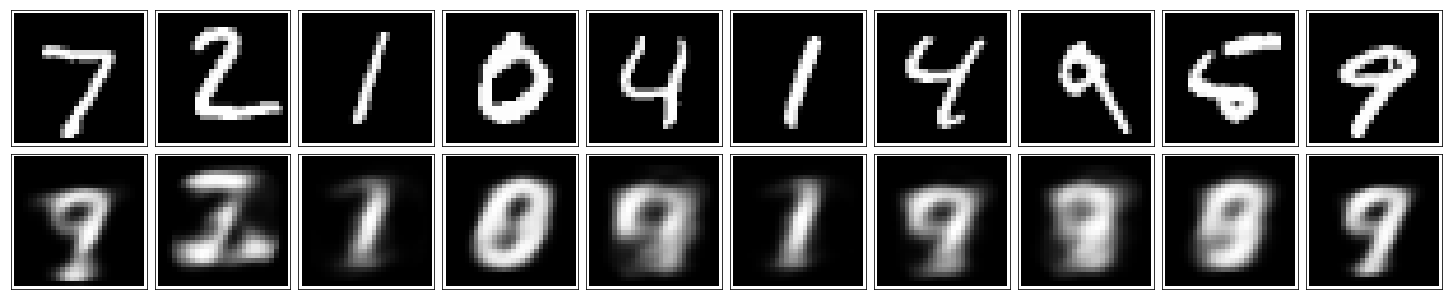

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [17]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.